# Demo 3

> Test Fast.ai models with a simple supervised learning test


In [1]:
# | default_exp demo.demo3

In [2]:
!gpustat

merlin                      Sat Jul 22 17:24:28 2023  525.116.04
[0] NVIDIA GeForce RTX 4090 | 40°C,   0 % | 10010 / 24564 MB | biagio(390M) biagio(2958M) biagio(263M) biagio(16M)
[1] NVIDIA GeForce RTX 4090 | 47°C,   0 % |     8 / 24564 MB | biagio(4M)


In [3]:
#| hide
from nbdev.showdoc import *

%matplotlib inline
from fastai.vision.all import *
from fastai.data.all import *
import torch.nn.functional as F

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

from Noise2Model.core import *

from IPython.display import clear_output, DisplayHandle
def update_patch(self, obj):
    clear_output(wait=True)
    self.display(obj)
DisplayHandle.update = update_patch

In [4]:
bs, size = 4, 512
# arch = models.resnet34
path = Path('../_data/Confocal_BPAE_B/')
path_train_raw = Path(path/"raw")
path_train_gt = Path(path/"gt")

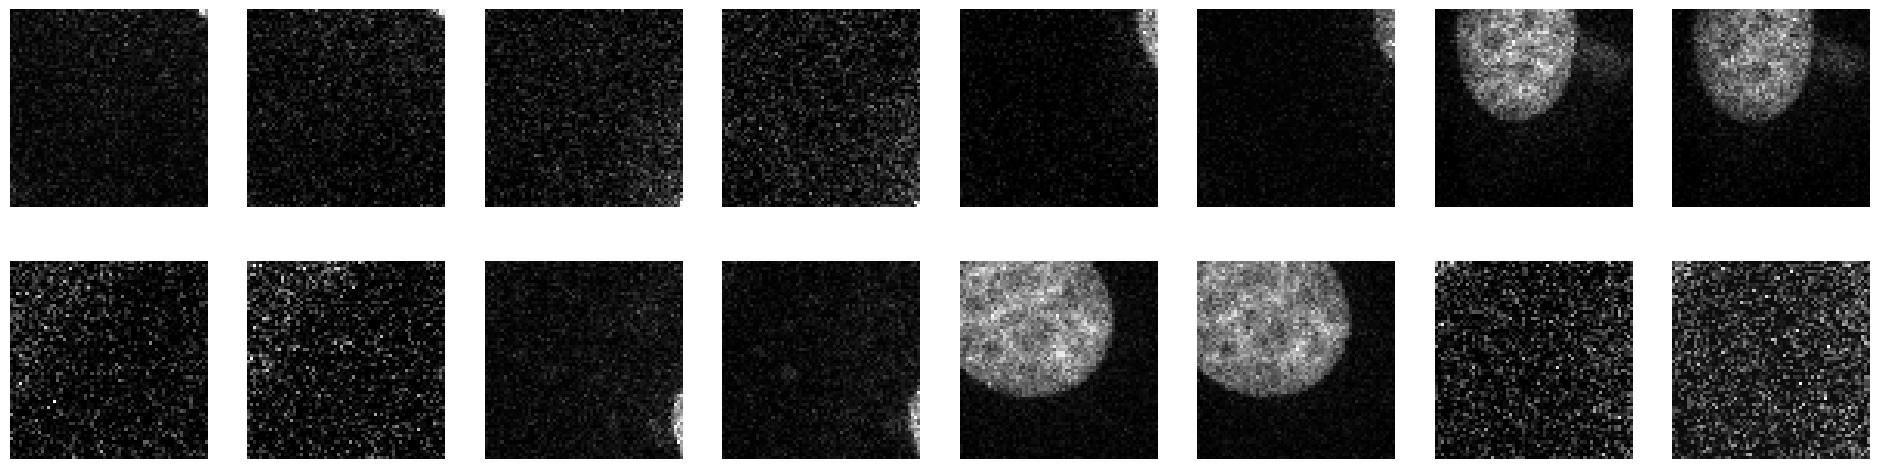

In [5]:
dblock = DataBlock(blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
                   get_items=get_image_files,
                   get_y=get_noisy_pair,
                   splitter=RandomSplitter(valid_pct=0.2),
                   item_tfms=RandomCrop(64),
                   )
# dblock.summary(path_train_raw)
# dsets = dblock.datasets(path_train_raw)
# dsets.train[0]
dls = dblock.dataloaders(path_train_raw)
dls.show_batch(max_n=8, cmap='gray')

In [6]:
from Noise2Model.models import UNet

In [7]:
autoencoder = UNet(3)
learn = Learner(dls, autoencoder, loss_func=F.l1_loss)
learn.summary()

UNet (Input shape: 64 x 1 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 64 x 64   
Conv2d                                    288        True      
BatchNorm2d                               64         True      
ReLU                                                           
Conv2d                                    9216       True      
BatchNorm2d                               64         True      
ReLU                                                           
____________________________________________________________________________
                     64 x 32 x 32 x 32   
MaxPool2d                                                      
____________________________________________________________________________
                     64 x 64 x 32 x 32   
Conv2d                                    18432      True      
BatchNorm2d                               128        True      
ReLU                                       

In [8]:
learn.show_training_loop()

Start Fit
   - before_fit     : [TrainEvalCallback, Recorder, ProgressCallback]
  Start Epoch Loop
     - before_epoch   : [Recorder, ProgressCallback]
    Start Train
       - before_train   : [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - before_batch   : [CastToTensor]
         - after_pred     : []
         - after_loss     : []
         - before_backward: []
         - before_step    : []
         - after_step     : []
         - after_cancel_batch: []
         - after_batch    : [TrainEvalCallback, Recorder, ProgressCallback]
      End Batch Loop
    End Train
     - after_cancel_train: [Recorder]
     - after_train    : [Recorder, ProgressCallback]
    Start Valid
       - before_validate: [TrainEvalCallback, Recorder, ProgressCallback]
      Start Batch Loop
         - **CBs same as train batch**: []
      End Batch Loop
    End Valid
     - after_cancel_validate: [Recorder]
     - after_validate : [Recorder, ProgressCallback]
  End Epoch Loop

In [9]:
# learn.lr_find()

In [10]:
# from fastai.callback.tensorboard import *
# layer = learn.model.conv_out
# cbs = [TensorBoardCallback(layer=layer, log_dir=Path('./tmp/runs/vision1', projector=True))] # , ShowGraphCallback()

In [12]:
learn.fit_one_cycle(10, lr_max=1e-03) #, cbs=cbs

epoch,train_loss,valid_loss,time
0,0.013574,0.014004,00:08
1,0.013388,0.014039,00:07
2,0.013294,0.014384,00:07
3,0.013554,0.014461,00:07
4,0.013746,0.014407,00:08
5,0.013664,0.014220,00:07
6,0.013566,0.014058,00:08
7,0.013588,0.014058,00:08
8,0.013388,0.014060,00:07
9,0.013224,0.014058,00:08


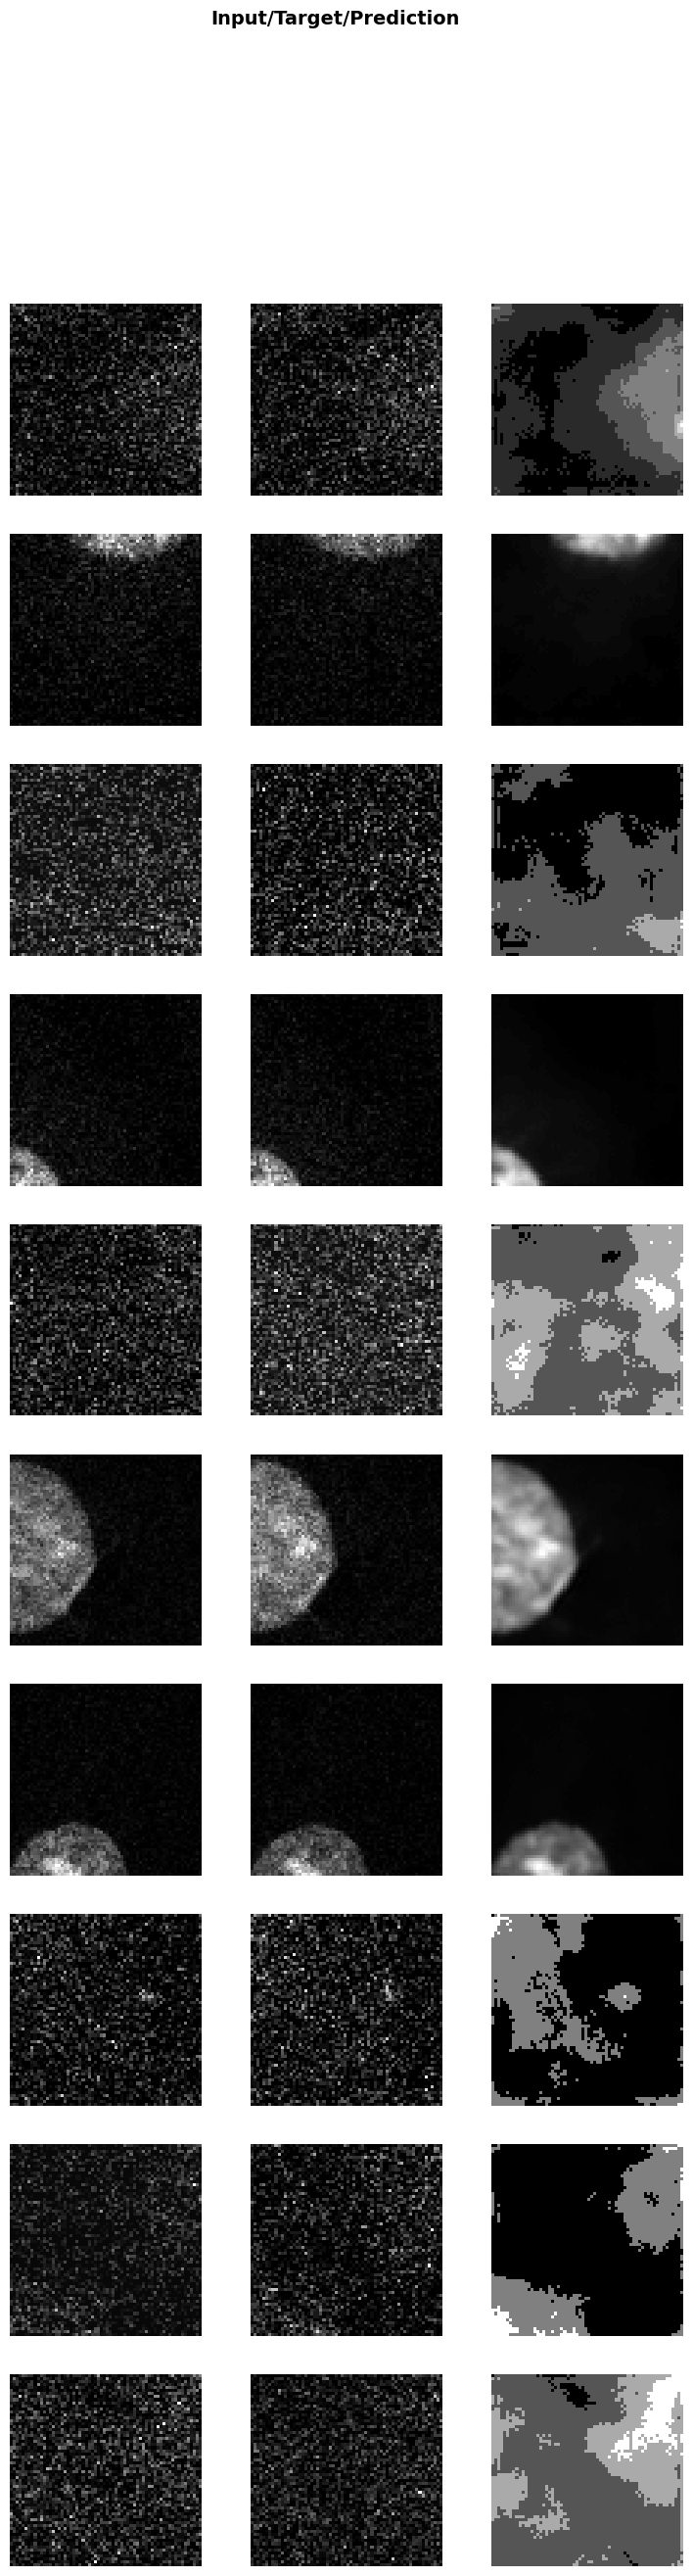

In [13]:
learn.show_results(max_n=10, cmap='gray')

In [14]:
# | hide
import nbdev
nbdev.nbdev_export()